In [2]:
import numpy as np
import random as rnd
from matplotlib import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import *
from qiskit.circuit.gate import Gate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_clifford
from qiskit.quantum_info import Clifford
import itertools as itert

In [3]:
simulator = QasmSimulator()

In [4]:
def Initial_Circuit_Gen(k,n,nr_regist):
    n_ancilla = n - k
    cr1 = ClassicalRegister(n-k,name="cr1")
    cr2 = ClassicalRegister(n,name="cr2")
    cr3 = ClassicalRegister(n,name="cr3")
    
    encoding_qubits_A = QuantumRegister(n-k, 'enc_A')
    logical_qubits_A = QuantumRegister(k,'phi_A')
    
    encoding_qubits_B = QuantumRegister(n-k, 'enc_B')
    #ancilla_qubits_B = QuantumRegister(n_ancilla,'anc_B')
    logical_qubits_B = QuantumRegister(k,'phi_B')
    
    
    qn = QuantumCircuit(encoding_qubits_A,logical_qubits_A,encoding_qubits_B,
                        logical_qubits_B,cr1,cr2,cr3)
    #if prepare_gates == []:
    #    return qn
    #else:
    #    for i in prepare_gates:
    #        qn.append(i[0],i[1])
    return qn

In [5]:
def Create_Max_Entanglement(circuit,n):
    for i in range(n):
        circuit.append(HGate(),[i])
        circuit.append(CXGate(),[i,i+n])
    return circuit
    

In [6]:
#Creates enconding A, and applies At to the circuit. Returns a list with the original Clifford unitaries
#and the respective indices
def Add_Clifford_Gates(circuit, n, n_cliff):
    ind =[i for i in range(n)]
    gates = []
    #int(np.ceil(n*m*np.log2(n)**2)) - optimal nº of gates
    for i in range(n_cliff):
        cliff = random_clifford(2)
        rnd.shuffle(ind)
        gates += [[cliff, ind[:2]]]
    for j,i in enumerate(reversed(gates)):
        cliff = i[0].transpose()
        ind = i[1]
        cliff = cliff.to_instruction()
        cliff.name = 'Cliff {}'.format(j)
        circuit.append(cliff, ind[:2])
    return(gates)

In [240]:
def Build_Stabilizers(circ,n,Cl_Gates):
    stab = Clifford(circ).stabilizer[n:]
    stab = stab.to_labels()
    return stab

In [371]:
#Recieves the full circuit and builds an ordered list of [Stabilizer(i)]

def Adjust_Stabilizers(full_circuit,stabilizers, n , k ):
    
    #circ = QuantumCircuit(n)
    
    #for i in full_circuit[0:full_circuit.size()]:
    #    print([i[0],i[1]])
    #    circ.append(i[0],i[1])
    
    #for i in reversed(Cl_Gates):
    #    cliff = i[0].transpose().to_labels()
    #    circ.append(cliff,i[1])
    print(stabilizers)
    stabs = []

    
    
    for j in range(len(stabilizers)):
        
        label = stabilizers[j]
        stab = QuantumCircuit(n,name='S{}'.format(j))
        
        for i in range(n+1):
            print([i,label[i],n-i])
            print(stab.draw())
            if label[i] == 'X':
                stab.append(XGate(),[n-i])
            elif label[i] == 'Y':
                stab.append(YGate(),[n-i])
            elif label[i] == 'Z':
                stab.append(ZGate(),[n-i])
        
        for i in range(n+1,2*n+1):
            print([i,label[i],"!"])
            print(stab.draw())
            if label[i] == 'X':
                stab.append(XGate(),[i-n-1])
            elif label[i] == 'Y':
                stab.append(YGate(),[i-n-1])
            elif label[i] == 'Z':
                stab.append(ZGate(),[i-n-1])
        
                
        #stabs = stabs + [stab]        
        stab = stab.to_gate()
        full_circuit.append(stab,[i for i in range(n,2*n)])
        #stab = stab.control()
        
        #the control method changes the order of the qubits
        
        """had_test = QuantumCircuit(n+1, name='S{}'.format(j))
        had_test.append(HGate(),[n])
        
        had_test.append(stab,[n]+[i for i in range(n)])
        
        had_test.append(HGate(),[n])
        
        if label[0]=='-':
            had_test.append(XGate(),[n])
        had_test_gate = had_test.to_instruction()
        stabilizers_cgates+=[had_test_gate]  """
    
    #print(len(stabilizers_cgates))
    #return([stabilizers_cgates,stab_c])

In [188]:
b=QuantumCircuit(3)

In [273]:
6%2

0

In [189]:
a = random_clifford(2)

In [134]:
a.transpose()

Clifford(StabilizerTable(
array([[False,  True,  True,  True],
       [ True, False,  True,  True],
       [False, False, False,  True],
       [ True, False, False,  True]]),
phase=array([False, False, False,  True])))

In [135]:
a

Clifford(StabilizerTable(
array([[False, False,  True,  True],
       [ True,  True,  True,  True],
       [False,  True, False,  True],
       [False, False,  True, False]]),
phase=array([ True, False, False, False])))

In [58]:
c=QuantumCircuit(2)

In [59]:
b.draw()

q_0: 
     
q_1: 
     
q_2:

In [14]:
Add_Clifford_Gates(c,2,2)

[[Clifford(StabilizerTable(
  array([[ True,  True,  True, False],
         [ True, False, False,  True],
         [ True, False, False, False],
         [ True,  True, False,  True]]),
  phase=array([False, False,  True, False]))),
  [0, 1]],
 [Clifford(StabilizerTable(
  array([[False, False,  True,  True],
         [False, False, False,  True],
         [ True, False, False, False],
         [ True,  True, False,  True]]),
  phase=array([ True, False, False,  True]))),
  [0, 1]]]

In [15]:
c.draw()

┌──────────┐┌──────────┐
q_0: ┤0         ├┤0         ├
     │  Cliff 0 ││  Cliff 1 │
q_1: ┤1         ├┤1         ├
     └──────────┘└──────────┘

In [221]:
a=Initial_Circuit_Gen(1,2,5)
Create_Max_Entanglement(a,2)
a.x(2)
stab = Clifford(a).stabilizer.to_labels()

In [220]:
a.draw()

┌───┐               
enc_A: ┤ H ├──■────────────
       ├───┤  │       ┌───┐
phi_A: ┤ H ├──┼────■──┤ X ├
       └───┘┌─┴─┐  │  └───┘
enc_B: ─────┤ X ├──┼───────
            └───┘┌─┴─┐     
phi_B: ──────────┤ X ├─────
                 └───┘     
cr1: 1/════════════════════
                           
cr2: 2/════════════════════
                           
cr3: 2/════════════════════

In [222]:
stab

['+IXIX', '+XIXI', '-IZIZ', '+ZIZI']

In [194]:
Create_Max_Entanglement(a,2).draw()

┌───┐          
enc_A_0: ┤ H ├──■───────
         ├───┤  │       
enc_A_1: ┤ H ├──┼────■──
         └───┘┌─┴─┐  │  
  phi_A: ─────┤ X ├──┼──
              └───┘┌─┴─┐
enc_B_0: ──────────┤ X ├
                   └───┘
enc_B_1: ───────────────
                        
  phi_B: ───────────────
                        
  cr1: 2/═══════════════
                        
  cr2: 3/═══════════════
                        
  cr3: 3/═══════════════

In [72]:
a.measure([0,1],[0,1])

In [74]:
a.measure([2,3],[2,3])

In [75]:
a.draw()

┌───┐          ┌─┐         
phi_A: ┤ H ├──■───────┤M├─────────
       ├───┤  │       └╥┘┌─┐      
enc_A: ┤ H ├──┼────■───╫─┤M├──────
       └───┘┌─┴─┐  │   ║ └╥┘┌─┐   
phi_B: ─────┤ X ├──┼───╫──╫─┤M├───
            └───┘┌─┴─┐ ║  ║ └╥┘┌─┐
enc_B: ──────────┤ X ├─╫──╫──╫─┤M├
                 └───┘ ║  ║  ║ └╥┘
anc_B: ────────────────╫──╫──╫──╫─
                       ║  ║  ║  ║ 
clb: 2/════════════════╩══╩══╬══╬═
                       0  1  ║  ║ 
                             ║  ║ 
crF: 2/══════════════════════╩══╩═
                             0  1

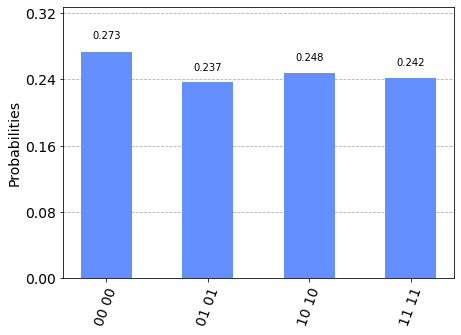

In [78]:
compiled_circuit = transpile(a, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts= result.get_counts(compiled_circuit)
plot_histogram(counts)

In [6]:
def Unencoder(circ,gates,n_cliff, n):
    name = n_cliff - 1
    for i in reversed(gates):
        cliff = i[0].conjugate().transpose()
        cliff = cliff.to_instruction()
        cliff.name = 'Cliff {} h'.format(name)
        print(i[1])
        print([i[1][0],i[1][1]])
        circ.append(cliff, [i[1][0]+n,i[1][1]+n])
        name -= 1

In [422]:
def PGrand(k, n, n_cliff,error):
    
    #Initial Circuit
    Circuit = Initial_Circuit_Gen(k ,n, n)
    Circuit.barrier()
    
    #Create pairs maximally entangled
    Create_Max_Entanglement(Circuit,n)
    Circuit.barrier()
    Cl_Gates = Add_Clifford_Gates(Circuit, n ,n_cliff)
    Circuit.barrier()
        
    
    #Construct Stabilizers####
    
    Stabilizers = Build_Stabilizers(Circuit,n,Cl_Gates)
    
    Adjust_Stabilizers(Circuit,Stabilizers, n , k )
    
    Circuit.barrier()
    
    
    
    #Add Ancillas###
    
    ###
    
    ###Error####
    #Circuit.barrier()
    
    #Add_Error(Circuit, n ,error[0],error[1],0,0)
    #############
    
    #Circuit.append(XGate(),[3])
    #Circuit.measure([0,1],[0,1])
    
    ###Measure k
    #Circuit.barrier()
    #Circuit.measure([i for i in range(0,n-k)],[i for i in range(0,n-k)])
    #Circuit.barrier()
    
    #Circuit.measure([i for i in range(n,2*n)],[i for i in range(n-k,2*n-k)])
    
    
    
    
    
    
    #####Error Correction######
    
    #Error_Types = [XGate(),ZGate()]
    #Error_List = Gen_All_Possible_Errors([XGate(),ZGate()],n,2)
    #Error_Correct(Circuit,Stabilizers,n,k,Error_List)
    
    ###########################
    
    
    ####Unencoder####
    Circuit.barrier()
    Unencoder(Circuit, Cl_Gates,n_cliff,n)
    Circuit.barrier()
    #################
    
    #for i in range(0,2*n):
    #    Circuit.append(ZGate(),[i])
    
    Circuit.measure([i for i in range(n)],[i for i in range(n-k,2*n-k)])
    
    Circuit.measure([i for i in range(n,2*n)],[i for i in range(2*n-k,3*n-k)])
    
    
    return [Circuit,Stabilizers]

In [1]:
k = 1
n = 3
n_cliff = 5
error = 0
[a,stab] = PGrand(k, n, n_cliff, error)


NameError: name 'PGrand' is not defined

In [424]:
stab

['+IIZYII', '+IZIIYY', '+ZIIIYI']

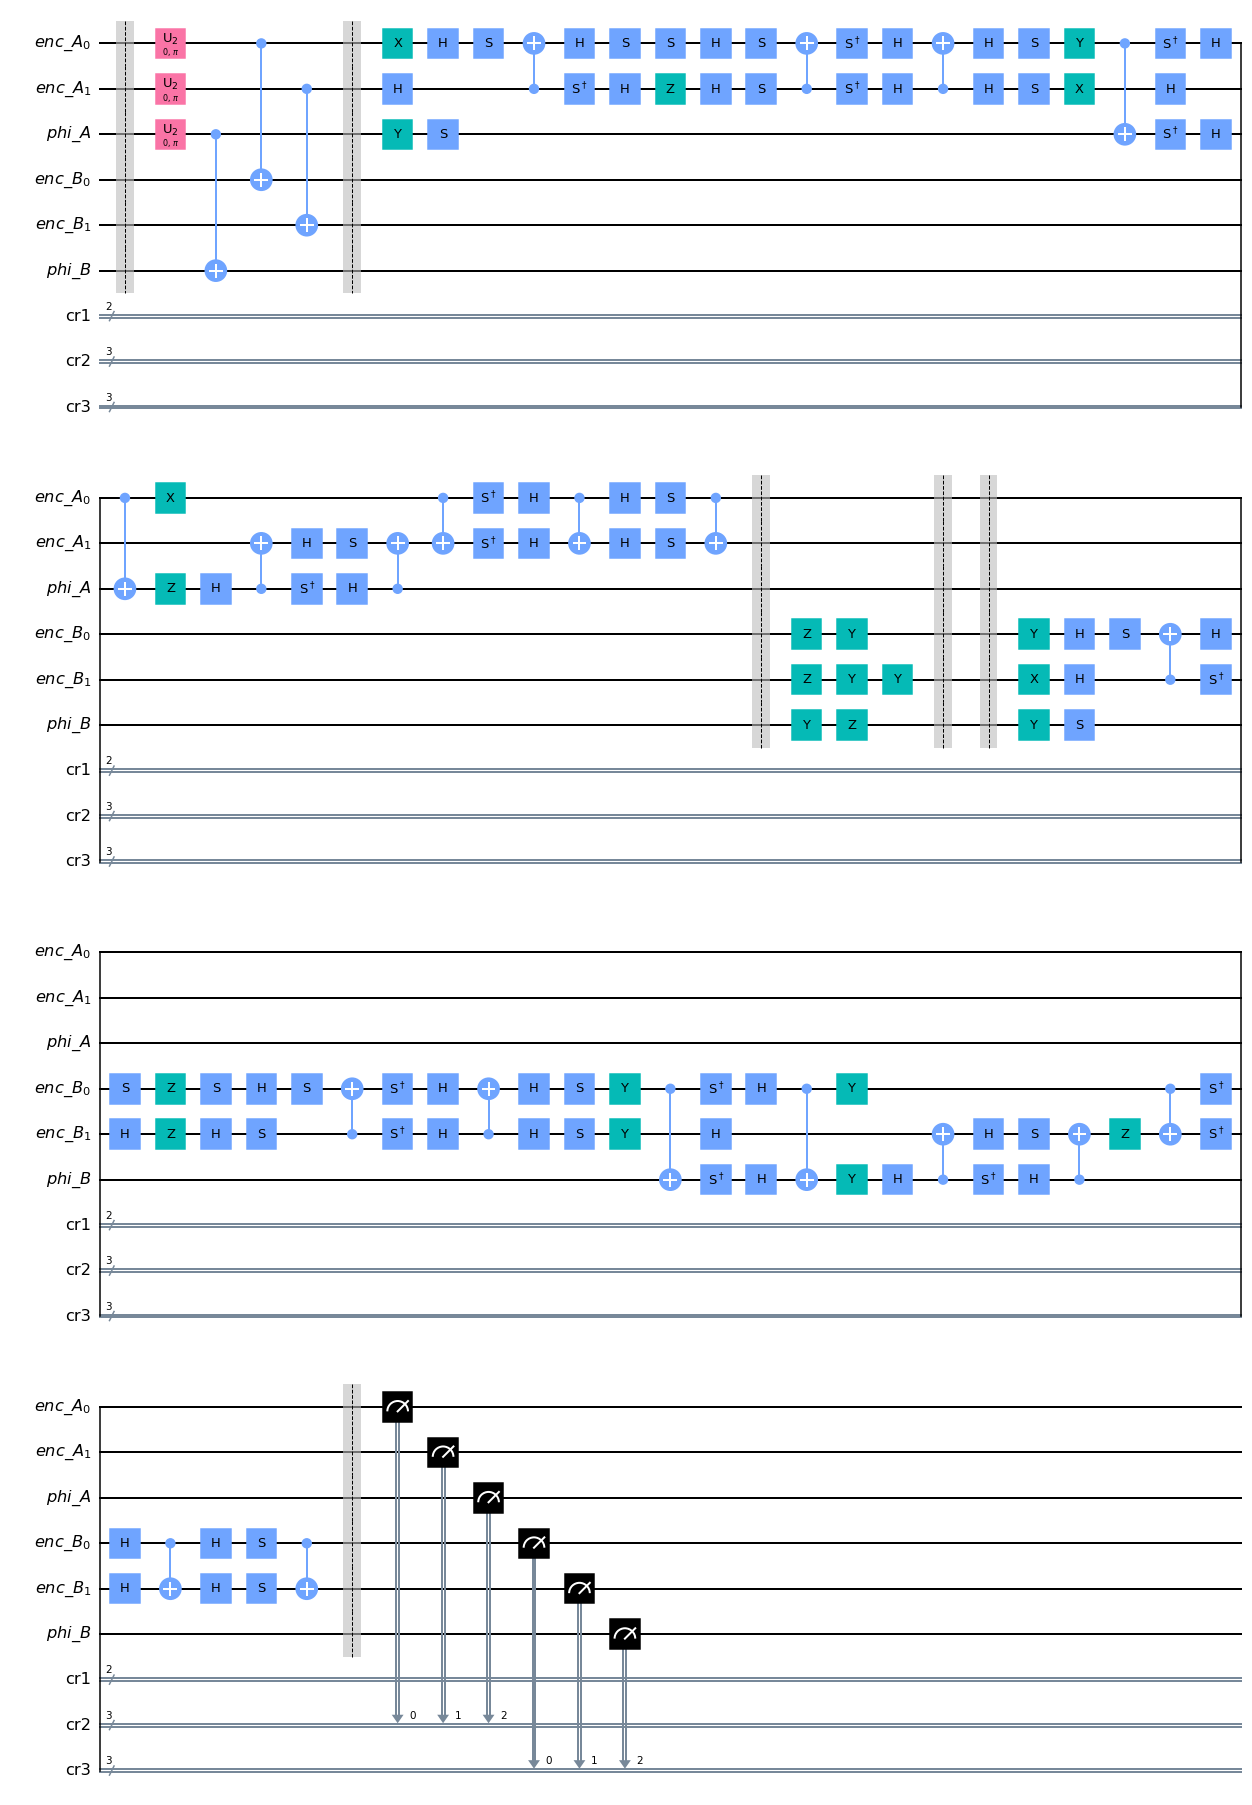

In [421]:
a.decompose().draw('mpl')

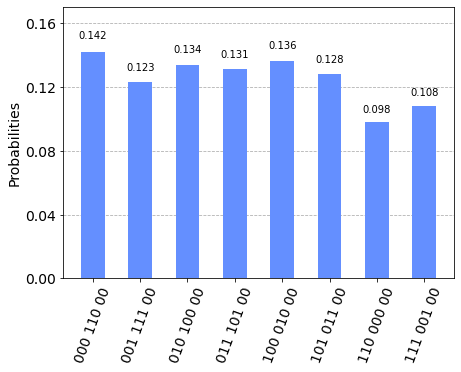

In [423]:
compiled_circuit = transpile(a, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts= result.get_counts(compiled_circuit)
plot_histogram(counts)

In [185]:
stab

['+IIZIIZ', '+IZIIZI', '+ZIIZII']

In [190]:
c[1]

8

In [8]:
%history -g

 3/1:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.generalized_gates.mcmt import MCMT
from qiskit.circuit.library import *
from qiskit.circuit.gate import Gate
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import AerSimulator
simulator = QasmSimulator()
 4/1:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.generalized_gates.mcmt import MCMT
from qiskit.circuit.library import *
from qiskit.circuit.gate import Gate
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import AerSimulato

9/1686:
a1 = QuantumRegister(2,'q')
anc = QuantumRegister(2,'anc')
a2 = ClassicalRegister(3,'c')
a = QuantumCircuit(a1,anc,a2)
n_cliffs = 10
b = [[random_clifford(2),rnd.shuffle([j for j in range(n)])] for i in range(n_cliffs)]
print(type(b))

#a.append(HGate(),[0])

#a.append(XGate(),[0])

for i in range(n_cliffs):
    a.append(b[i][0],b[i][1])

c = Build_Stabilizers(a,2,1)



#a =a.compose(c,[0,1,2])

a.barrier()
#Add_Stabilizers(a,c,2,1)

#a.append(b[0][0],b[0][1])


#a.append(C_Stabilizer(b,1,2,1),[2,0,1])
#a.append(HGate(),[2])
#a.barrier()
#a.measure([2],[2])
#a.barrier()
#a.append(XGate(),[0]).c_if(a2[2],1)

#a.z(1).c_if(2,1)


#Syndrome0Q(a,a2,2,1)
#Error_Correct(a,a2,2,1,C_Stabilizer(b,1,2,1),[ [[XGate()],[[0]]] ] )


#Unencoder

#for i in range(n_cliffs):
#    print(n_cliffs-i-1)
#    a.append(b[n_cliffs-i-1][0].conjugate().transpose(),b[n_cliffs-i-1][1])
    
#a.append(b[1][0].conjugate().transpose(),b[1][1])
#a.append(b[0][0].conjugate().transpose(),b[0][1])

#Syndrome0Q(ci

    return [Circuit,Stabilizers]
29/981:
k = 2
n = 5
n_cliff = 10
error = 0
[a,stab] = PGrand(k, n, n_cliff, error)
29/982: stab
29/983: a.draw('mpl')
29/984:
#Recieves the full circuit and builds an ordered list of [Stabilizer(i)]

def Add_Stabilizer_Test(full_circuit,stabilizers, n , k ):
    
    #circ = QuantumCircuit(n)
    
    #for i in full_circuit[0:full_circuit.size()]:
    #    print([i[0],i[1]])
    #    circ.append(i[0],i[1])
    
    #for i in reversed(Cl_Gates):
    #    cliff = i[0].transpose().to_labels()
    #    circ.append(cliff,i[1])
    print(stabilizers)
    stabs = []

    
    
    for j in range(len(stabilizers)):
        
        label = stabilizers[j]
        stab = QuantumCircuit(n,name='S{}'.format(j))
        
        for i in range(n+1,2*n+1):
            print([i,label[i],"!"])
            print(stab.draw())
            if label[i] == 'X':
                stab.append(XGate(),[i-n-1])
            elif label[i] == 'Y':
                stab.append(YGate(),